# Exercise 4.10 Coding Etiquette & Excel Reporting
## Part 1, Steps 1 to 4
##### By Claudia Lan Yee Chiu

# Table of Contents

####  1. Importing Analysis and Visualization Libraries
####  2. Addressing PII Data
####  3. Creating a regional segmentation
#####     3a. Defining the regions as per Wikipedia
#####     3b. Creating a new ´region´ column and assigning the States accordingly
#####     3c. Determine the spending habits between the different U.S. regions
####  4. Creating an exclusion flag for low-activity customers: customers with less than 5 orders
#####     4a. Creating a new activity flag based on the ´max_order' value of the customers
#####     4b. Creating subsets of both low and high activity customers and export
#####     4c. Exporting low and high activity dataframes

## 1. Importing Analysis and Visualization Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Assign path
path = r'C:\Users\clany\OneDrive\Documents\CareerFoundry\Chap_4_Pythons Fundamentals for Data Analysts\Instacart Basket Analysis'

#### Importing the data set from Exercise 4.9 - Latest merged version with new customers column

In [3]:
# Import the data set
df_ords_prods_cust = pd.read_pickle(os.path.join( path, 'Data', 'Prepared Data', 'ords_prods_customer_merge.pkl'))

In [4]:
# Check of imported dataframe
df_ords_prods_cust.head(4)

,order_id,user_id,eval_set,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
# Check the shape of the dataframe
df_ords_prods_cust.shape

(32404859, 35)

## 2. Addressing PII Data

#### In order to mitigate the security risks associated with personally identifiable information (PII) within the dataframe, it will be necessary to eliminate the 'first_name' and 'last_name' columns. These particular columns contain data that can directly identify an individual, and their exclusion is essential for safeguarding the confidentiality and privacy of this sensitive information.

In [6]:
# Drop the columns with PII Data

df_opc_nonames=df_ords_prods_cust.drop(columns=['first_name', 'last_name'])

In [7]:
# Check the result of dropping PII columns
df_opc_nonames.head()

,order_id,user_id,eval_set,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,spending_flag,median_prior_order,frequency_flag,gender,state,age,date_joined,number_of_dependants,family_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [8]:
# Checking the full columns names for any further PII data
pd.options.display.max_columns = None

In [9]:
df_opc_nonames.head(3)

,order_id,user_id,eval_set,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_order,frequency_flag,gender,state,age,date_joined,number_of_dependants,family_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,NaN,NaN,Regularly busy,Normal days,Average Orders,10,New Customer,6.367797,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,NaN,NaN,Regularly busy,Slowest days,Average Orders,10,New Customer,6.367797,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,NaN,NaN,Regularly busy,Slowest days,Most Orders,10,New Customer,6.367797,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


## 3. Creating a regional segmentation: 
#### Generating a new column 'Region' based on the 'State' information

#### 3a. Defining the regions as per Wikipedia

In [10]:
# Creating the four regions of the United States using below Wikipedia site:
# https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States

Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

#### 3b. Creating a new region column and assigning the States accordingly

In [12]:
# Create new Region column and assign the states as defined above

df_opc_nonames.loc[df_opc_nonames['state'].isin(Northeast), 'region'] = 'Northeast'
df_opc_nonames.loc[df_opc_nonames['state'].isin(Midwest), 'region'] = 'Midwest'
df_opc_nonames.loc[df_opc_nonames['state'].isin(South), 'region'] = 'South'
df_opc_nonames.loc[df_opc_nonames['state'].isin(West), 'region'] = 'West'

In [14]:
# Check the outcome

df_opc_nonames['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [15]:
# Check shape

df_opc_nonames.shape

(32404859, 34)

In [16]:
# Check all columns names

df_opc_nonames.columns

Index(['order_id', 'user_id', 'eval_set', 'number_of_orders',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', '_merge', ' price_range_loc',
       'price_range_loc', 'busiest_day', 'Busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_prior_order', 'frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'number_of_dependants', 'family_status',
       'income', 'region'],
      dtype='object')

#### 3c. Determine the spending habits between the different U.S. regions

In [17]:
# Check for spending habits by crossing the `region` with the `spending flag`

crosstab = pd.crosstab(df_opc_nonames['region'], df_opc_nonames['spending_flag'], dropna = False)

In [18]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


Text(0.5, 0, 'Regions')

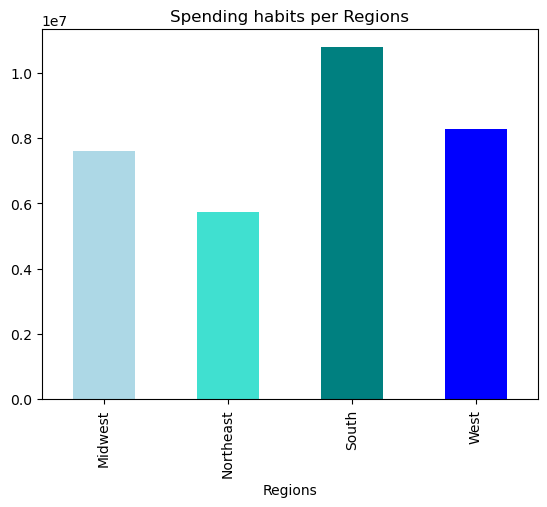

In [24]:
# Visualize the regional distribution and save in memory

regional_distrib = df_opc_nonames['region'].value_counts().sort_index().plot.bar(color = ['lightblue', 'turquoise', 'teal', 'blue'])
plt.title('Spending habits per Regions')
plt.xlabel('Regions')

In [25]:
# Export above bar chart as image file

regional_distrib.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'regional_expenditure.png'))

##### Conclusion from above data:
High spenders make up a relatively small portion, around 2%, of the overall data, while low-spenders dominate with a frequency of 98%. Variations in spending behavior are evident across different U.S. regions. In the South, both high and low spenders are more prevalent, constituting approximately 33% of each group. The Midwest and West regions exhibit similar spending patterns, with approximately 25% of both high and low spenders. Conversely, the Northeast stands out with the lowest percentage, accounting for roughly 17% of both high-spenders and low-spenders.

## 4. Create an exclusion flag for low-activity customers: customers with less than 5 orders

#### 4a. Create a new activity flag based on the ´max_order' value of the customers

In [26]:
# Create activity_flag for customers with less than 5 orders

df_opc_nonames.loc[df_opc_nonames['max_order'] < 5, 'activity_flag'] = 'low activity customer'

In [27]:
# Create activity_flag for customers with 5 or more orders

df_opc_nonames.loc[df_opc_nonames['max_order'] >= 5, 'activity_flag'] = 'high activity customer'

In [28]:
# Print frequency of the new `activity_flag`

df_opc_nonames['activity_flag'].value_counts(dropna = False)

high activity customer    30964564
low activity customer      1440295
Name: activity_flag, dtype: int64

In [29]:
# Check output

df_opc_nonames[['user_id', 'activity_flag', 'max_order']].head()

,user_id,activity_flag,max_order
0,1,high activity customer,10
1,1,high activity customer,10
2,1,high activity customer,10
3,1,high activity customer,10
4,1,high activity customer,10


#### 4b. Creating subsets of both low and high activity customers and export

In [30]:
# Create a subset for low activity customers

df_low_activity_customers = df_opc_nonames[df_opc_nonames['activity_flag']=='low activity customer']

In [31]:
# Check output

df_low_activity_customers.head()

,order_id,user_id,eval_set,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_order,frequency_flag,gender,state,age,date_joined,number_of_dependants,family_status,income,region,activity_flag
1510,520620,120,prior,1,3,11,NaN,196,2,0,Soda,77,7,9.0,both,NaN,NaN,Regularly busy,Slowest days,Most Orders,3,New Customer,9.385714,Low spender,18.0,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,low activity customer
1511,3273029,120,prior,3,2,8,19.0,196,2,1,Soda,77,7,9.0,both,NaN,NaN,Regularly busy,Normal days,Average Orders,3,New Customer,9.385714,Low spender,18.0,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,low activity customer
1512,520620,120,prior,1,3,11,NaN,46149,1,0,Zero Calorie Cola,77,7,13.4,both,NaN,NaN,Regularly busy,Slowest days,Most Orders,3,New Customer,9.385714,Low spender,18.0,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,low activity customer
1513,3273029,120,prior,3,2,8,19.0,46149,1,1,Zero Calorie Cola,77,7,13.4,both,NaN,NaN,Regularly busy,Normal days,Average Orders,3,New Customer,9.385714,Low spender,18.0,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,low activity customer
1514,520620,120,prior,1,3,11,NaN,26348,3,0,Mixed Fruit Fruit Snacks,50,19,3.1,both,NaN,NaN,Regularly busy,Slowest days,Most Orders,3,New Customer,9.385714,Low spender,18.0,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,low activity customer


In [32]:
# Check shape

df_low_activity_customers.shape

(1440295, 35)

In [33]:
# Create a subset for high activity customers

df_high_activity_customers = df_opc_nonames[df_opc_nonames['activity_flag']=='high activity customer']

In [34]:
# Check shape

df_high_activity_customers.shape

(30964564, 35)

In [35]:
# Check  that both new activity flag dataframes have same shape as main dataframe

len(df_low_activity_customers) + len(df_high_activity_customers)

32404859

In [36]:
# Check shape of main dataframe

df_opc_nonames.shape

(32404859, 35)

Both low and high activity dataframes yield the sum of the main dataframe

#### 4c. Exporting and high activity dataframes

In [37]:
# Export and save low activity dataframe

df_low_activity_customers.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'low_activity_customers.pkl'))

In [38]:
# Export and save high activity dataframe

df_high_activity_customers.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'high_activity_customers.pkl'))